Logan Tucker
Task 2 : Multi-class Classification
CS74 
S23

# Prep Phase
    step 1) load in data 
    step 3) clean data
    step 4) vectorize

Load in data
***************************************************************************************************************************************************************************

In [6]:
import pandas as pd
import numpy as np

# upload Training.csv and Test.csv 
training = pd.read_csv('Training.csv')
test = pd.read_csv('Test.csv')

training.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,image,style,category
0,1,False,"11 12, 2016",C413C78E10E54C5DB41837889F36C1E8,565D194F38B1CC3F806EE677C61F639C,465E154EC79AFFAB5EB2607198B21433,all of the reviews for this product are fake.,"All fake reviews, beware.",1478908800,2.0,NaN,{'Size:': ' Polaris H4'},automotive
1,1,True,"12 6, 2016",490AE37808EFEE3AF4FE6DEBDEB5A4C8,0D66512A0A7F580523AB996378DF0F14,760C63E8E5E8DC3FAA01878D37BA5678,wrong part. our fault.,One Star,1480982400,NaN,NaN,NaN,automotive
2,1,True,"09 17, 2014",74A9FA5A64449BEE2A2E8E3F62872F0F,A0E45600FF2C5A779CB4314F379C253A,C6E4DD5C1C4EC09E90182644ED6CA9EF,this wire set it really sucks!!!,One Star,1410912000,NaN,NaN,NaN,automotive
3,1,True,"06 11, 2016",EB561158A2829D98B467FE03CC1E45F1,37AB9A82470595E0ACB88BAC48C150EE,F4892A77EA45C52F40AB17ED537EF9FF,"first use, it leaked instantly. even at 5 buck...",One Star,1465603200,NaN,NaN,"{'Color:': ' Clear', 'Style:': ' 45 Degree'}",automotive
4,1,True,"12 23, 2017",5045D801332850D21618DD13A697CD9B,5772FF30428EEB8E0258C1A53CA2EC50,522F0BBFF2B47F1D63FF781A0AB1D079,didn't fit,One Star,1513987200,NaN,NaN,NaN,automotive


Clean data
***************************************************************************************************************************************************************************

In [7]:
# account for blank spots
training.fillna('', inplace = True)
test.fillna('', inplace = True)

Vectorize data
***************************************************************************************************************************************************************************

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

# set up train test split
x1 = training['reviewText']
x2 = training['summary']
y = training['overall']

# vectorize the text 
vectorizer1 = TfidfVectorizer(ngram_range = (1, 2))
vectorizer2 = TfidfVectorizer(ngram_range = (1, 2))

# get review text frequency dict
x1 = vectorizer1.fit_transform(x1)
x2 = vectorizer2.fit_transform(x2)

x = hstack((x1, x2))

# create train test split for cross
train_x_tf, test_x_tf, train_y, test_y = train_test_split(x, y, test_size=.1, random_state=16)


# Classifier #1 : Naive bayes
    step 1) train
    step 2) report
    step 3) tune
    step 4) report

In [9]:
# perform naive bayes 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

nb = MultinomialNB()
nb.fit(train_x_tf, train_y)

# predict the label of the test samples here using the model
test_predicted_nb = nb.predict(test_x_tf)

# get model acuracy score
print("Accuracy: \n")
print(accuracy_score(test_y, test_predicted_nb))


Accuracy: 

0.5693730729701952


PRE - tune report
***************************************************************************************************************************************************************************

In [10]:
from sklearn.metrics import roc_auc_score, classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

# confusion matrix
confusion = confusion_matrix(test_y, test_predicted_nb)
print('Confusion Matrix:\n')
print(confusion)

# f1
print('\n\nMacro F1-score: {:.2f}\n'.format(f1_score(test_y, test_predicted_nb, average='macro')))

# roc auc score
print('ROC AUC: ')
pred_prob = nb.predict_proba(test_x_tf)
print(roc_auc_score(test_y, pred_prob, multi_class = 'ovr'))

# classification report
print("\nClassification report: \n")
print(classification_report(test_predicted_nb, test_y))

Confusion Matrix:

[[355 175  35   9   4]
 [ 91 378 108  27   1]
 [ 32 165 304 100   3]
 [ 17  60 119 346  33]
 [  8  49  32 189 279]]


Macro F1-score: 0.58

ROC AUC: 
0.8738595514453742

Classification report: 

              precision    recall  f1-score   support

           1       0.61      0.71      0.66       503
           2       0.62      0.46      0.53       827
           3       0.50      0.51      0.51       598
           4       0.60      0.52      0.56       671
           5       0.50      0.87      0.64       320

    accuracy                           0.57      2919
   macro avg       0.57      0.61      0.58      2919
weighted avg       0.58      0.57      0.56      2919



Hypertune
***************************************************************************************************************************************************************************

In [11]:
from sklearn.model_selection import GridSearchCV

param_grid_nb = [{
    "alpha": [0.1, 0.5, 1.0, 1.5, 2.0], 
    "force_alpha": [True, False], 
    "fit_prior": [True, False]
}]

nb_gs = MultinomialNB()

grid_search = GridSearchCV(nb_gs, param_grid_nb, cv=5, scoring="accuracy", return_train_score=True)

# train it
grid_search.fit(train_x_tf, train_y)

# get model with best params
best_params_nb = grid_search.best_params_
print("Best parameters: ")
print(best_params_nb)

# get best score
best_score_nb = grid_search.best_score_
print("\nBest accuracy: ")
print(best_score_nb)

# get predected y of best model
tuned_test_predicted_nb = grid_search.predict(test_x_tf)


Best parameters: 
{'alpha': 1.0, 'fit_prior': False, 'force_alpha': True}

Best accuracy: 
0.5763228016749143


POST - tune report
***************************************************************************************************************************************************************************

In [12]:
# confusion matrix
confusion = confusion_matrix(test_y, tuned_test_predicted_nb)
print('Confusion Matrix: \n')
print(confusion)

# f1
print('\nMacro F1-score: {:.2f}\n'.format(f1_score(test_y, tuned_test_predicted_nb, average='macro')))

# roc auc score
print('ROC AUC: ')
pred_prob = grid_search.predict_proba(test_x_tf)
print(roc_auc_score(test_y, pred_prob, multi_class = 'ovr'))

# classification report
print("\nClassification report: \n")
print(classification_report(tuned_test_predicted_nb, test_y))

Confusion Matrix: 

[[354 175  35  10   4]
 [ 87 375 113  29   1]
 [ 32 162 304 101   5]
 [ 16  56 117 350  36]
 [  8  43  30 190 286]]

Macro F1-score: 0.58

ROC AUC: 
0.8740424729580812

Classification report: 

              precision    recall  f1-score   support

           1       0.61      0.71      0.66       497
           2       0.62      0.46      0.53       811
           3       0.50      0.51      0.51       599
           4       0.61      0.51      0.56       680
           5       0.51      0.86      0.64       332

    accuracy                           0.57      2919
   macro avg       0.57      0.61      0.58      2919
weighted avg       0.58      0.57      0.57      2919



# Classifier #2 : Support vector machines
    step 1) train
    step 2) report
    step 3) tune
    step 4) report

In [13]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

sv = CalibratedClassifierCV(LinearSVC())
sv.fit(train_x_tf, train_y)

# predict the label of the test samples here using the model
test_predicted_sv = sv.predict(test_x_tf)

# get model acuracy score
print("Accuracy: ")
print(accuracy_score(test_y, test_predicted_sv))

Accuracy: 
0.6015758821514218


PRE - tune report
***************************************************************************************************************************************************************************

In [14]:
# confusion matrix
confusion = confusion_matrix(test_y, test_predicted_sv)
print('Confusion Matrix: \n')
print(confusion)

# f1
print('\nMacro F1-score: {:.2f}\n'.format(f1_score(test_y, test_predicted_sv, average='macro')))

# roc auc score
print('ROC AUC: ')
pred_prob = sv.predict_proba(test_x_tf)
print(roc_auc_score(test_y, pred_prob, multi_class = 'ovr'))

# classification report
print("\nClassification report: \n")
print(classification_report(test_predicted_sv, test_y))

Confusion Matrix: 

[[428 100  28  14   8]
 [140 304 104  38  19]
 [ 49 106 288 121  40]
 [ 21  26  93 322 113]
 [ 11  11  22  99 414]]

Macro F1-score: 0.60

ROC AUC: 
0.8726035702972043

Classification report: 

              precision    recall  f1-score   support

           1       0.74      0.66      0.70       649
           2       0.50      0.56      0.53       547
           3       0.48      0.54      0.51       535
           4       0.56      0.54      0.55       594
           5       0.74      0.70      0.72       594

    accuracy                           0.60      2919
   macro avg       0.60      0.60      0.60      2919
weighted avg       0.61      0.60      0.61      2919



Hypertune
***************************************************************************************************************************************************************************

In [15]:
param_grid_sv = [{
    'method': ['sigmoid', 'isotonic']
}]
    
sv_gs = CalibratedClassifierCV(LinearSVC())

grid_search = GridSearchCV(sv_gs, param_grid_sv, cv=5, scoring="accuracy", return_train_score=True)

# train it
grid_search.fit(train_x_tf, train_y)

# get model with best params
best_params_sv = grid_search.best_params_
print("Best parameters: ")
print(best_params_sv)

# get best score
best_score_sv = grid_search.best_score_
print("\nBest accuracy: ")
print(best_score_sv)

# get predected y of best model
tuned_test_predicted_sv = grid_search.predict(test_x_tf)

Best parameters: 
{'method': 'isotonic'}

Best accuracy: 
0.597487628473544


POST - tune report
***************************************************************************************************************************************************************************

In [16]:
# confusion matrix
confusion = confusion_matrix(test_y, tuned_test_predicted_sv)
print('Confusion Matrix: \n')
print(confusion)

# f1
print('\nMacro F1-score: {:.2f}\n'.format(f1_score(test_y, tuned_test_predicted_sv, average='macro')))

# roc auc score
print('ROC AUC: ')
pred_prob = grid_search.predict_proba(test_x_tf)
print(roc_auc_score(test_y, pred_prob, multi_class = 'ovr'))

# classification report
print("\nClassification report: \n")
print(classification_report(tuned_test_predicted_sv, test_y))

Confusion Matrix: 

[[433  98  23  15   9]
 [156 293  97  38  21]
 [ 55 108 277 121  43]
 [ 23  29  76 316 131]
 [ 10  12  18  89 428]]

Macro F1-score: 0.60

ROC AUC: 
0.8723722344615533

Classification report: 

              precision    recall  f1-score   support

           1       0.75      0.64      0.69       677
           2       0.48      0.54      0.51       540
           3       0.46      0.56      0.51       491
           4       0.55      0.55      0.55       579
           5       0.77      0.68      0.72       632

    accuracy                           0.60      2919
   macro avg       0.60      0.59      0.60      2919
weighted avg       0.62      0.60      0.60      2919



# Classifier #3 : K neighbors
    step 1) train
    step 2) report
    step 3) tune
    step 4) report

In [17]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn = kn.fit(train_x_tf, train_y)

# predict the label of the test samples here using the model
test_predicted_kn = kn.predict(test_x_tf)

# get model acuracy score
print("Accuracy: ")
print(accuracy_score(test_y, test_predicted_kn))

Accuracy: 
0.4463857485440219


PRE - tune report
***************************************************************************************************************************************************************************

In [18]:
# confusion matrix
confusion = confusion_matrix(test_y, test_predicted_kn)
print('Confusion Matrix: \n')
print(confusion)

# f1
print('\nMacro F1-score: {:.2f}\n'.format(f1_score(test_y, test_predicted_kn, average='macro')))

# roc auc score
print('ROC AUC: ')
pred_prob = kn.predict_proba(test_x_tf)
print(roc_auc_score(test_y, pred_prob, multi_class = 'ovr'))

# classification report
print("\nClassification report: \n")
print(classification_report(test_predicted_kn, test_y))

Confusion Matrix: 

[[379  34  36  90  39]
 [222 151  61 139  32]
 [176  33 190 154  51]
 [111   8  62 298  96]
 [ 87   4  32 149 285]]

Macro F1-score: 0.44

ROC AUC: 
0.7273904214553255

Classification report: 

              precision    recall  f1-score   support

           1       0.66      0.39      0.49       975
           2       0.25      0.66      0.36       230
           3       0.31      0.50      0.39       381
           4       0.52      0.36      0.42       830
           5       0.51      0.57      0.54       503

    accuracy                           0.45      2919
   macro avg       0.45      0.49      0.44      2919
weighted avg       0.52      0.45      0.46      2919



Hypertune
***************************************************************************************************************************************************************************

In [19]:
param_grid_knn = [{
    "n_neighbors": [3, 5], 
    "p": [1, 2]
}]
    
knn_gs = KNeighborsClassifier()

grid_search = GridSearchCV(knn_gs, param_grid_knn, cv=3, scoring="accuracy", return_train_score=True)

# train it
grid_search.fit(train_x_tf, train_y)

# get model with best params
best_params_kn = grid_search.best_params_
print("Best parameters: ")
print(best_params_kn)

# get best score
best_score_kn = grid_search.best_score_
print("\nBest accuracy: ")
print(best_score_kn)

# get predected y of best model
tuned_test_predicted_kn = grid_search.predict(test_x_tf)

Best parameters: 
{'n_neighbors': 5, 'p': 2}

Best accuracy: 
0.43677207291140263


POST - tune report
***************************************************************************************************************************************************************************

In [20]:
# confusion matrix
confusion = confusion_matrix(test_y, tuned_test_predicted_kn)
print('Confusion Matrix: \n')
print(confusion)

# f1
print('\nMacro F1-score: {:.2f}\n'.format(f1_score(test_y, tuned_test_predicted_kn, average='macro')))

# roc auc score
print('ROC AUC: ')
pred_prob = grid_search.predict_proba(test_x_tf)
print(roc_auc_score(test_y, pred_prob, multi_class = 'ovr'))

# classification report
print("\nClassification report: \n")
print(classification_report(tuned_test_predicted_kn, test_y))

Confusion Matrix: 

[[379  34  36  90  39]
 [222 151  61 139  32]
 [176  33 190 154  51]
 [111   8  62 298  96]
 [ 87   4  32 149 285]]

Macro F1-score: 0.44

ROC AUC: 
0.7273904214553255

Classification report: 

              precision    recall  f1-score   support

           1       0.66      0.39      0.49       975
           2       0.25      0.66      0.36       230
           3       0.31      0.50      0.39       381
           4       0.52      0.36      0.42       830
           5       0.51      0.57      0.54       503

    accuracy                           0.45      2919
   macro avg       0.45      0.49      0.44      2919
weighted avg       0.52      0.45      0.46      2919



ROC curves of top performing classifier
***************************************************************************************************************************************************************************

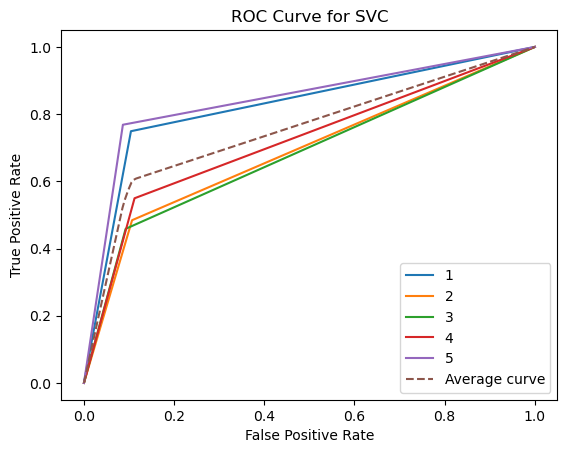

In [21]:
from sklearn.metrics import roc_curve, auc

fig, ax = plt.subplots()
ax.set_title("ROC Curve for SVC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

fpr_list = []
tpr_list = []

for rating in [1, 2, 3, 4, 5]:
  pred_y_binary = [1 if y == rating else 0 for y in tuned_test_predicted_sv]
  test_y_binary = [1 if y == rating else 0 for y in test_y]
    
  fpr, tpr, thresholds_NB = roc_curve(test_y_binary, pred_y_binary)

  ax.plot(fpr, tpr, label = rating)
    
  fpr_list.append(fpr)
  tpr_list.append(tpr)


avg_fpr = np.linspace(0, 1, 200)
avg_tpr = np.zeros(len(avg_fpr))

for index in [0, 1, 2, 3, 4]:
  avg_tpr += np.interp(avg_fpr, fpr_list[index], tpr_list[index])/5

ax.plot(avg_fpr, avg_tpr, "--", label='Average curve')
ax.legend()